[![Fixel Algorithms](https://i.imgur.com/AqKHVZ0.png)](https://fixelalgorithms.gitlab.io/)

# K-Means

> Notebook by:
> - Royi Avital RoyiAvital@fixelalgorithms.com

## Revision History

| Version | Date       | User        |Content / Changes                                                   |
|---------|------------|-------------|--------------------------------------------------------------------|
| 1.0.000 | 11/04/2024 | Royi Avital | First version                                                      |

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/AIProgram/2024_02/0057ClusteringKMeans.ipynb)

In [1]:
# Import Packages

# General Tools
import numpy as np
import scipy as sp
import pandas as pd

# Machine Learning
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Miscellaneous
import math
import os
from platform import python_version
import random
import timeit

# Typing
from typing import Callable, Dict, List, Optional, Self, Set, Tuple, Union

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Jupyter
from IPython import get_ipython
from IPython.display import Image
from IPython.display import display
from ipywidgets import Dropdown, FloatSlider, interact, IntSlider, Layout, SelectionSlider
from ipywidgets import interact

## Notations

* <font color='red'>(**?**)</font> Question to answer interactively.
* <font color='blue'>(**!**)</font> Simple task to add code for the notebook.
* <font color='green'>(**@**)</font> Optional / Extra self practice.
* <font color='brown'>(**#**)</font> Note / Useful resource / Food for thought.

Code Notations:

```python
someVar    = 2; #<! Notation for a variable
vVector    = np.random.rand(4) #<! Notation for 1D array
mMatrix    = np.random.rand(4, 3) #<! Notation for 2D array
tTensor    = np.random.rand(4, 3, 2, 3) #<! Notation for nD array (Tensor)
tuTuple    = (1, 2, 3) #<! Notation for a tuple
lList      = [1, 2, 3] #<! Notation for a list
dDict      = {1: 3, 2: 2, 3: 1} #<! Notation for a dictionary
oObj       = MyClass() #<! Notation for an object
dfData     = pd.DataFrame() #<! Notation for a data frame
dsData     = pd.Series() #<! Notation for a series
hObj       = plt.Axes() #<! Notation for an object / handler / function handler
```

### Code Exercise

 - Single line fill

 ```python
 vallToFill = ???
 ```

 - Multi Line to Fill (At least one)

 ```python
 # You need to start writing
 ????
 ```

 - Section to Fill

```python
#===========================Fill This===========================#
# 1. Explanation about what to do.
# !! Remarks to follow / take under consideration.
mX = ???

???
#===============================================================#
```

In [2]:
# Configuration
# %matplotlib inline

seedNum = 512
np.random.seed(seedNum)
random.seed(seedNum)

# Matplotlib default color palette
lMatPltLibclr = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
# sns.set_theme() #>! Apply SeaBorn theme

runInGoogleColab = 'google.colab' in str(get_ipython())


In [3]:
# Constants

FIG_SIZE_DEF    = (8, 8)
ELM_SIZE_DEF    = 50
CLASS_COLOR     = ('b', 'r')
EDGE_COLOR      = 'k'
MARKER_SIZE_DEF = 10
LINE_WIDTH_DEF  = 2


In [4]:
# Courses Packages
import sys
sys.path.append('../')
sys.path.append('../../')
sys.path.append('../../../')
from utils.DataVisualization import PlotScatterData


In [5]:
# General Auxiliary Functions

def PlotKMeans( mX: np.ndarray, numClusters: int, numIter: int, initMethod: str = 'random', hA: Optional[plt.Axes] = None, figSize: Tuple[int, int] = FIG_SIZE_DEF, markerSize: int = MARKER_SIZE_DEF ):

    if hA is None:
        hF, hA = plt.subplots(figsize = figSize)
    else:
        hF = hA.get_figure()

    oKMeans = KMeans(n_clusters = numClusters, init = initMethod, n_init = 1, max_iter = numIter, random_state = 0).fit(mX)

    vIdx    = oKMeans.predict(mX)
    mMu     = oKMeans.cluster_centers_
    vor     = sp.spatial.Voronoi(mMu)

    sp.spatial.voronoi_plot_2d(vor, ax = hA, show_points = False, line_width = 2, show_vertices = False)
    hA.scatter(mX[:, 0], mX[:, 1], s = ELM_SIZE_DEF, c = vIdx, edgecolor = EDGE_COLOR)
    hA.plot(mMu[:,0], mMu[:, 1], '.r', markersize = 20)
    hA.axis('equal')
    hA.axis([-12, 8, -12, 8])
    hA.set_xlabel('${{x}}_{{1}}$')
    hA.set_ylabel('${{x}}_{{2}}$')
    hA.set_title(f'K-Means Clustering, Inertia = {oKMeans.inertia_}')

    return hA


## Clustering by K-Means

This notebook demonstrates the use the K-Means for clustering.

In [6]:
# Parameters

# Data Generation
numSamplesCluster   = 150
noiseStd            = 0.1

# Model

# Data Visualization



## Generate / Load Data

Isotropic data clusters.


In [7]:
# Generate Data

mMu = np.array([[4,   4],
                [-3, -3],
                [-2, -8],
                [-8, -2]])

numClusters = mMu.shape[0]
# Generating samples by *Isotropic Gaussian**
mX = np.concatenate([np.random.randn(numSamplesCluster, 2) + vMu for vMu in mMu])
vL = np.repeat(range(numClusters), numSamplesCluster)
numSamples  = mX.shape[0]


print(f'The features data shape: {mX.shape}')

The features data shape: (600, 2)


* <font color='red'>(**?**)</font> Where are the labels in this case?

### Plot Data

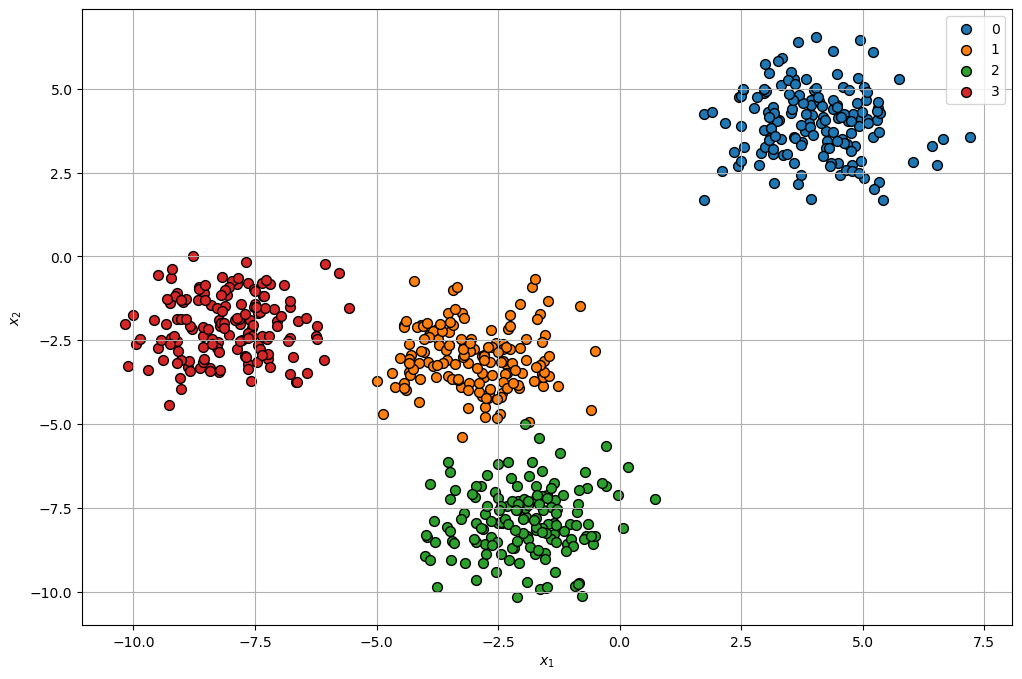

In [8]:
# Plot the Data

hF, hA = plt.subplots(figsize = (12, 8))

hA = PlotScatterData(mX, vL, hA = hA)

plt.show()


* <font color='red'>(**?**)</font> Are there points which are confusing in their labeling?

## Cluster Data by K-Means

1. Step I:  
Assume fixed centroids $\left\{ \boldsymbol{\mu}_{k}\right\} $, find the optimal clusters $\left\{ \mathcal{D}_{k}\right\} $:  
$$\arg\min_{\left\{ \mathcal{D}_{k}\right\} }\sum_{k = 1}^{K}\sum_{\boldsymbol{x}_{i}\in\mathcal{D}_{k}}\left\Vert \boldsymbol{x}_{i}-\boldsymbol{\mu}_{k}\right\Vert _{2}^{2}$$
$$\implies \boldsymbol{x}_{i}\in\mathcal{D}_{s\left(\boldsymbol{x}_{i}\right)} \; \text{where} \; s\left(\boldsymbol{x}_{i}\right)=\arg\min_{k}\left\Vert \boldsymbol{x}_{i}-\boldsymbol{\mu}_{k}\right\Vert _{2}^{2}$$

2. Step II:  
Assume fixed clusters $\left\{ \mathcal{D}_{k}\right\} $, find the optimal centroids $\left\{ \boldsymbol{\mu}_{k}\right\} $:
$$\arg\min_{\left\{ \boldsymbol{\mu}_{k}\right\} }\sum_{k=1}^{K}\sum_{\boldsymbol{x}_{i}\in\mathcal{D}_{k}}\left\Vert \boldsymbol{x}_{i}-\boldsymbol{\mu}_{k}\right\Vert _{2}^{2}$$
$$\implies\boldsymbol{\mu}_{k}=\frac{1}{\left|\mathcal{D}_{k}\right|}\sum_{\boldsymbol{x}_{i}\in\mathcal{D}_{k}}\boldsymbol{x}_{i}$$

3. Step III:  
Check for convergence (Change in assignments / location of the center). If not, go to _Step I_.

* <font color='brown'>(**#**)</font> The K-Means is implemented in [`KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).
* <font color='brown'>(**#**)</font> Some implementations of the algorithm supports different metrics.


* <font color='red'>(**?**)</font> Think of the convergence check options. Think of the cases of large data set vs. small data set.
* <font color='red'>(**?**)</font> What does the `predict()` method in [`KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) do?

In [9]:
# Plotting Wrapper

hPlotKMeans = lambda numClusters, numIter, initMethod: PlotKMeans(mX, numClusters = numClusters, numIter = numIter, initMethod = initMethod, figSize = (8, 8))

In [10]:
# Interactive Visualization


numClustersSlider = IntSlider(min = 3, max = 10, step = 1, value = 3, layout = Layout(width = '30%'))
numIterSlider = IntSlider(min = 1, max = 20, step = 1, value = 1, layout = Layout(width = '30%'))
initMethodDropdown = Dropdown(description = 'Initialization Method', options = [('Random', 'random'), ('K-Means++', 'k-means++')], value = 'random')
interact(hPlotKMeans, numClusters = numClustersSlider, numIter = numIterSlider, initMethod = initMethodDropdown)

plt.show()

## Assumptions by K-Means Model  

The K-Means has few built in assumptions.  
This sections illustrates the cases the assumptions are invalid.

In [ ]:
# From SciKit Learn

plt.figure(figsize = (12, 12))

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Incorrect number of clusters
y_pred = KMeans(n_clusters=2, n_init='auto', random_state=random_state).fit_predict(X)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")

# Anisotropic distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, n_init='auto', random_state=random_state).fit_predict(X_aniso)

plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Anisotropic Distributed Blobs")

# Different variance
X_varied, y_varied = make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state)
y_pred = KMeans(n_clusters=3, n_init='auto', random_state=random_state).fit_predict(X_varied)

plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Unequal Variance")

# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3, n_init='auto', random_state=random_state).fit_predict(X_filtered)

plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs")

plt.show()

: 